## Siler analytics - social media

Fonte de dados: PostgreSQL (tabela silver.user)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import warnings

warnings.filterwarnings('ignore', category=UserWarning, message='.*SQLAlchemy.*')

In [ ]:
DB_CONFIG = {
    'host': 'localhost',
    'port': 5433,
    'database': 'social_media',
    'user': 'postgres',
    'password': 'postgres'
}

conn = psycopg2.connect(**DB_CONFIG)

df_silver = pd.read_sql_query("""
    SELECT 
        user_id, age, gender, country, urban_rural, income_level, 
        employment_status, relationship_status, exercise_hours_per_week, 
        sleep_hours_per_night, diet_quality, smoking, alcohol_frequency, 
        perceived_stress_score, self_reported_happiness, body_mass_index, 
        blood_pressure_systolic, blood_pressure_diastolic, 
        daily_steps_count, weekly_work_hours, social_events_per_month, 
        books_read_per_year, volunteer_hours_per_month, 
        daily_active_minutes_instagram, reels_watched_per_day, 
        stories_viewed_per_day, ads_viewed_per_day, ads_clicked_per_day, 
        time_on_feed_per_day, time_on_explore_per_day, 
        time_on_reels_per_day, followers_count, following_count, 
        content_type_preference, preferred_content_theme, 
        user_engagement_score
    fROM silver.user """,conn)

print(f"✓ {len(df_silver):,} registros extraídos do PostgreSQL")

✓ 416,183 registros carregados do PostgreSQL


## OBJETIVOS E REGRAS DE NEGÓCIO DO PROJETO

O projeto tem como objetivo analisar uma base de dados de usuários do instagram, como o foco principal na área de saúde, ou seja, focamos principalmente nas colunas que teriam informações importantes para entender melhor a saúde dos nossos usuários, os dados foram tratados de acordo com a nossas regras de negócios tendo como produto final dashboards no power BI, com o intuito de mostrar padrões de usuários do instagram com a finalidade de dar uma audiência qualificada para empresas interessadas como planos de saûde, academia e outros serviços relacionados a saûde fisica dos usuarios, além disso alguns gráficos também possibilitarão empresas que querem vender seus produtos, como uma loja de tênis de corrida, por exemplo.

Como principal regras de negócios foi acordado que:
- Nosso projeto filtrou os países da base de dados, com isso o enfoque foi apenas nos países da América que estavam presentes na base, que são: Brasil, Canada e Estados Unidos;
- Para um público mais qualificado foi filtrado apenas para maiores de 18 anos;
- Foram retiradas as colunas que não seriam de valor para o projeto de 58 colunas iniciais restaram apenas 38. 
- Retirar os outliers da base de dados para uma melhor análise.

Cada gráfico que será mostrado abaixo também foi utilizada uma regra de negócio específica, que será falada na descrição do mesmo.

## Porcentagem de usuários por país

Para saber onde devemos concentrar os investementos de divulgação foi feito um gráfico com a porcentagem de usuarios de cada pais 

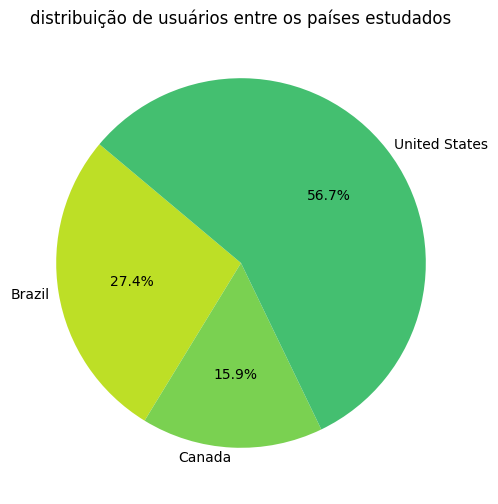

In [ ]:
paises_count = df_silver.groupby('country').country.count()
plt.figure(figsize=(10,6))
plt.pie(paises_count, autopct='%1.1f%%', startangle=140,labels= paises_count.index,colors = plt.cm.viridis(np.linspace(0.9, 0, 10)), labeldistance=1.05)
plt.title('Distribuição de usuários entre os países estudados')
plt.show()